In [1]:
!pip install plotly_express

## Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from scipy.optimize import curve_fit
import statsmodels.api as sms

#%matplotlib inline
# import plotly.express as px
# import plotly.graph_objects as go
# from plotly.subplots import make_subplots
# plt.rcParams['figure.figsize'] = [15, 5]
# from IPython import display
# from ipywidgets import interact, widgets



In [2]:
## Read Data for Cases, Deaths and Recoveries
ConfirmedCases_raw=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')
Deaths_raw=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv')
Recoveries_raw=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv')

In [4]:
ConfirmedCases_raw.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20', '3/16/20', '3/17/20', '3/18/20'],
      dtype='object')

In [5]:
### Melt the dateframe into the right shape and set index
def cleandata(df_raw):
    df_cleaned=df_raw.melt(id_vars=['Province/State','Country/Region','Lat','Long'],value_name='Cases',var_name='Date')
#     df_cleaned=df_cleaned.set_index(['Country/Region','Province/State','Date'])
    df_cleaned.reset_index()
    return df_cleaned 

# Clean all datasets
ConfirmedCases=cleandata(ConfirmedCases_raw)
Deaths=cleandata(Deaths_raw)
Recoveries=cleandata(Recoveries_raw)

In [6]:
ConfirmedCases.rename(columns={'Country/Region': 'Country'}, inplace=True)
ConfirmedCases['Date'] = pd.to_datetime(ConfirmedCases.Date)

In [7]:
def func_exp(x, a, b):
        return a * np.exp(b * x)

def exponential_regression (x_data, y_data):
    popt, pcov = curve_fit(func_exp, x_data, y_data)
    print(popt)
    puntos = plt.plot(x_data, y_data, 'x', color='xkcd:maroon', label = "data")
    curva_regresion = plt.plot(x_data, func_exp(x_data, *popt), color='xkcd:teal', label = "fit: {:.3f}, {:.3f}, {:.3f}".format(*popt))
    plt.legend()
    plt.show()
    return func_exp(x_data, *popt)

In [10]:
ConfirmedCases.head()

,Province/State,Country,Lat,Long,Date,Cases
0,NaN,Thailand,15.0000,101.0000,2020-01-22,2
1,NaN,Japan,36.0000,138.0000,2020-01-22,2
2,NaN,Singapore,1.2833,103.8333,2020-01-22,0
3,NaN,Nepal,28.1667,84.2500,2020-01-22,0
4,NaN,Malaysia,2.5000,112.5000,2020-01-22,0


In [72]:
italy = ConfirmedCases.query(" Country == 'Italy' ").Cases.to_numpy()
x_data = np.arange(0,len(italy[30:]))
y_data = np.log(italy[30:])

In [12]:
china = ConfirmedCases[ConfirmedCases.Country == 'China']
china = china.groupby(['Country', 'Date'])['Cases'].sum().reset_index().Cases.to_numpy()
x_data = np.arange(0,len(china))
y_data = np.log(china)

In [13]:
# Model for China

china = ConfirmedCases.query(" Country == 'China' ")
china = china.groupby(['Country', 'Date'])['Cases'].sum().reset_index().sort_values('Date').Cases.to_numpy()

x_data = np.arange(0,len(china))
y_data = np.log(china)

mod = sms.OLS(y_data, x_data)
res = mod.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.824
Model:                            OLS   Adj. R-squared (uncentered):              0.820
Method:                 Least Squares   F-statistic:                              261.5
Date:                Thu, 19 Mar 2020   Prob (F-statistic):                    9.29e-23
Time:                        22:49:36   Log-Likelihood:                         -165.62
No. Observations:                  57   AIC:                                      333.2
Df Residuals:                      56   BIC:                                      335.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

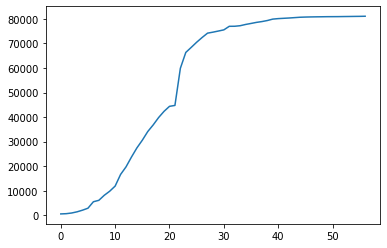

In [14]:
china = ConfirmedCases.query(" Country == 'China' ")
china = china.groupby(['Country', 'Date'])['Cases'].sum().reset_index().sort_values('Date').Cases
china.plot()

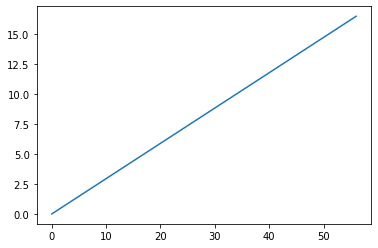

In [15]:
ypred = res.predict(x_data)
plt.plot(ypred)

In [16]:
import datetime
today = datetime.date.today()
yesterday = today - datetime.timedelta(days=1)
current_date = yesterday.strftime("%Y-%m-%d")

In [18]:
df = ConfirmedCases.groupby(['Country', 'Date'])['Cases'].sum().reset_index()
countries = ['Spain', 'France', 'Poland', 'Germany']
# df.Country  countries
# df[df.Date == current_date]


['Spain', 'France', 'Poland', 'Germany']

In [47]:
a = np.arange(1,5)

In [49]:
b = np.arange(1,5)

In [50]:
np.true_divide(a,b)

array([1., 1., 1., 1.])

In [73]:
italy = italy[40:]

In [74]:
italy

array([ 2036,  2502,  3089,  3858,  4636,  5883,  7375,  9172, 10149,
       12462, 12462, 17660, 21157, 24747, 27980, 31506, 35713],
      dtype=int64)

In [75]:
first = italy[:len(italy)-1]
second = italy[1:len(italy)]

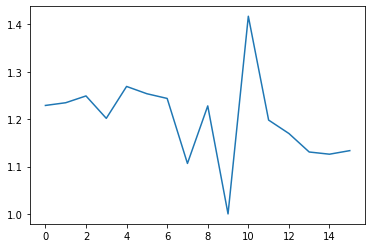

In [76]:
growth = np.true_divide(second, first)
plt.plot(growth)

In [81]:
# funkcja liczaca growth dla ostatnich 20 dni dla danego kraju

def calculate_growth(country, days):

#     days = liczba dni wstecz dla ktorych liczymy growth
#     country = "Italy"

    country_data = ConfirmedCases.query(" Country == @country ").Cases.to_numpy()
    final = country_data[len(country_data)-@days: len(country_data)]
    first = final[:len(final)-1] # lista pierwsza 
    second = final[1:len(final)] # druga lista przesunieta o 1, zeby policzyc growth dzienny
    growth = np.true_divide(second, first) #funkcja ktora liczy growth
    
    print(growth)
    plt.plot(growth)  

[1.27027027 1.50177305 1.20188902 1.22888016 1.23461231 1.24894788
 1.20165889 1.26898188 1.2536121  1.24366102 1.10651984 1.22790423
 1.         1.41710801 1.19801812 1.16968379 1.1306421  1.12601858
 1.13353012]


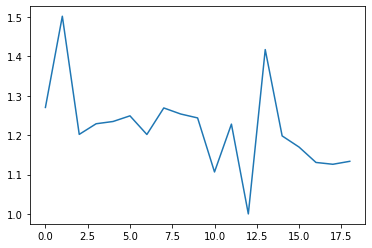

In [82]:
calculate_growth("Italy", 20)